##### Plotting the image from the training

In [1]:
# import mnist dataset from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'].values, mnist['target']

print(x.shape, y.shape)

(70000, 784) (70000,)


In [2]:
print(type(x), type(y))

y = y.values
print(type(x), type(y))
print(x.shape, y.shape)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'pandas.core.arrays.categorical.Categorical'>
(70000, 784) (70000,)


In [3]:
print(type(y[0]))
y = y.astype(int)
print(type(y[0]))

<class 'str'>
<class 'numpy.int32'>


In [4]:
import numpy as np

print(type(y))
np.unique(y, return_counts=True)

<class 'numpy.ndarray'>


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [5]:
# normalize x to keep our gradients manageable
x = x / 255

In [6]:
# to build a zero-classifier, make the label 1 when we have a zero, and 0 otherwise
y_new = np.zeros(shape=y.shape)
y_new[np.where(y == 8)] = 1
y = y_new

In [7]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([63175,  6825], dtype=int64))

In [9]:
# we can make our train/test split. we'll also transform the data into the shape we want, with each example in a column(instead of a row)
m = 60000
m_test = x.shape[0] - m

x_train, x_test = x[:m].T, x[m:].T
y_train, y_test = y[:m], y[m:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[:,0].shape, y_train.shape)

(784, 60000) (60000,) (784, 10000) (10000,)
(784,) (60000,)


In [12]:
x_train_0 = x_train[:, -1].reshape(-1, 1)
y_train_0 = np.array([y_train[-1]])
print(x_train_0.shape)
print(y_train_0.shape)

(784, 1)
(1,)


In [13]:
# finally we shuffle the training set for good measure
m = 1
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train_0, y_train_0 = x_train_0[:, shuffle_index], y_train_0[shuffle_index]
print(x_train_0.shape, y_train_0.shape)

(784, 1) (1,)


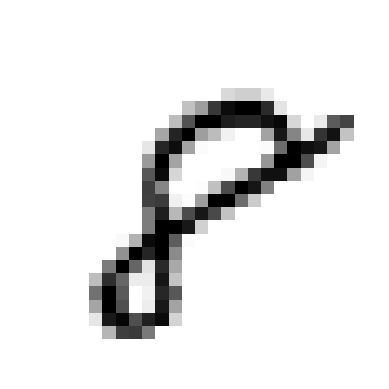

[1.]


In [14]:
# take a look at a random image
import matplotlib
import matplotlib.pyplot as plt

i = 59999
plt.imshow(x_train_0.reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
print(y_train_0)

##### Build & Train

In [22]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    L = -(1.0/m) * (np.sum(np.multiply(np.log(Y_hat), Y)) + np.sum(np.multiply(np.log(1-Y_hat), (1-Y))))
    return L

In [16]:
learning_rate = 1

In [17]:
X, Y = x_train_0, y_train_0
print(X.shape, Y.shape)

(784, 1) (1,)


In [18]:
n_x = X.shape[0]    # number of features
m = X.shape[1]      # number of examples
print(n_x, m)

784 1


In [19]:
W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))
print(f"W.shape : {W.shape},  b.shape : {b.shape}")

W.shape : (784, 1),  b.shape : (1, 1)


In [20]:
Z = np.matmul(W.T, X) + b
print(f"Z.shape : {Z.shape}")

A = sigmoid(Z)
print(f"A.shape : {A.shape}")

print(f"(A-Y).T shape : {((A-Y).T).shape}")


dW = (1/m) * np.matmul(X, (A-Y).T)
print(f"dW.shape : {dW.shape}")

db = (1/m) * np.sum((A-Y)).reshape(-1,1)
print(f"db.shape : {db.shape}")
print(db)

Z.shape : (1, 1)
A.shape : (1, 1)
(A-Y).T shape : (1, 1)
dW.shape : (784, 1)
db.shape : (1, 1)
[[-0.47170922]]


In [23]:
X_list = []

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    
    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum((A-Y)).reshape(-1,1)
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if (i % 100 == 0):
        print(f"Epoch {i:>4d}   cost : {cost}")        
        first_digit = A[:, 0] / W * 255.0
        X_list.append(first_digit)
        
print(f"Final cost : {cost}")

Epoch    0   cost : 0.638108421823752
Epoch  100   cost : 5.1292303737683545e-14
Epoch  200   cost : 5.1292303737683545e-14
Epoch  300   cost : 5.1292303737683545e-14
Epoch  400   cost : 5.1292303737683545e-14
Epoch  500   cost : 5.1292303737683545e-14
Epoch  600   cost : 5.1292303737683545e-14
Epoch  700   cost : 5.1292303737683545e-14
Epoch  800   cost : 5.1292303737683545e-14
Epoch  900   cost : 5.1292303737683545e-14
Epoch 1000   cost : 5.1292303737683545e-14
Epoch 1100   cost : 5.1292303737683545e-14
Epoch 1200   cost : 5.1292303737683545e-14
Epoch 1300   cost : 5.1292303737683545e-14
Epoch 1400   cost : 5.1292303737683545e-14
Epoch 1500   cost : 5.1292303737683545e-14
Epoch 1600   cost : 5.1292303737683545e-14
Epoch 1700   cost : 5.1292303737683545e-14
Epoch 1800   cost : 5.1292303737683545e-14
Epoch 1900   cost : 5.1292303737683545e-14
Final cost : 5.1292303737683545e-14


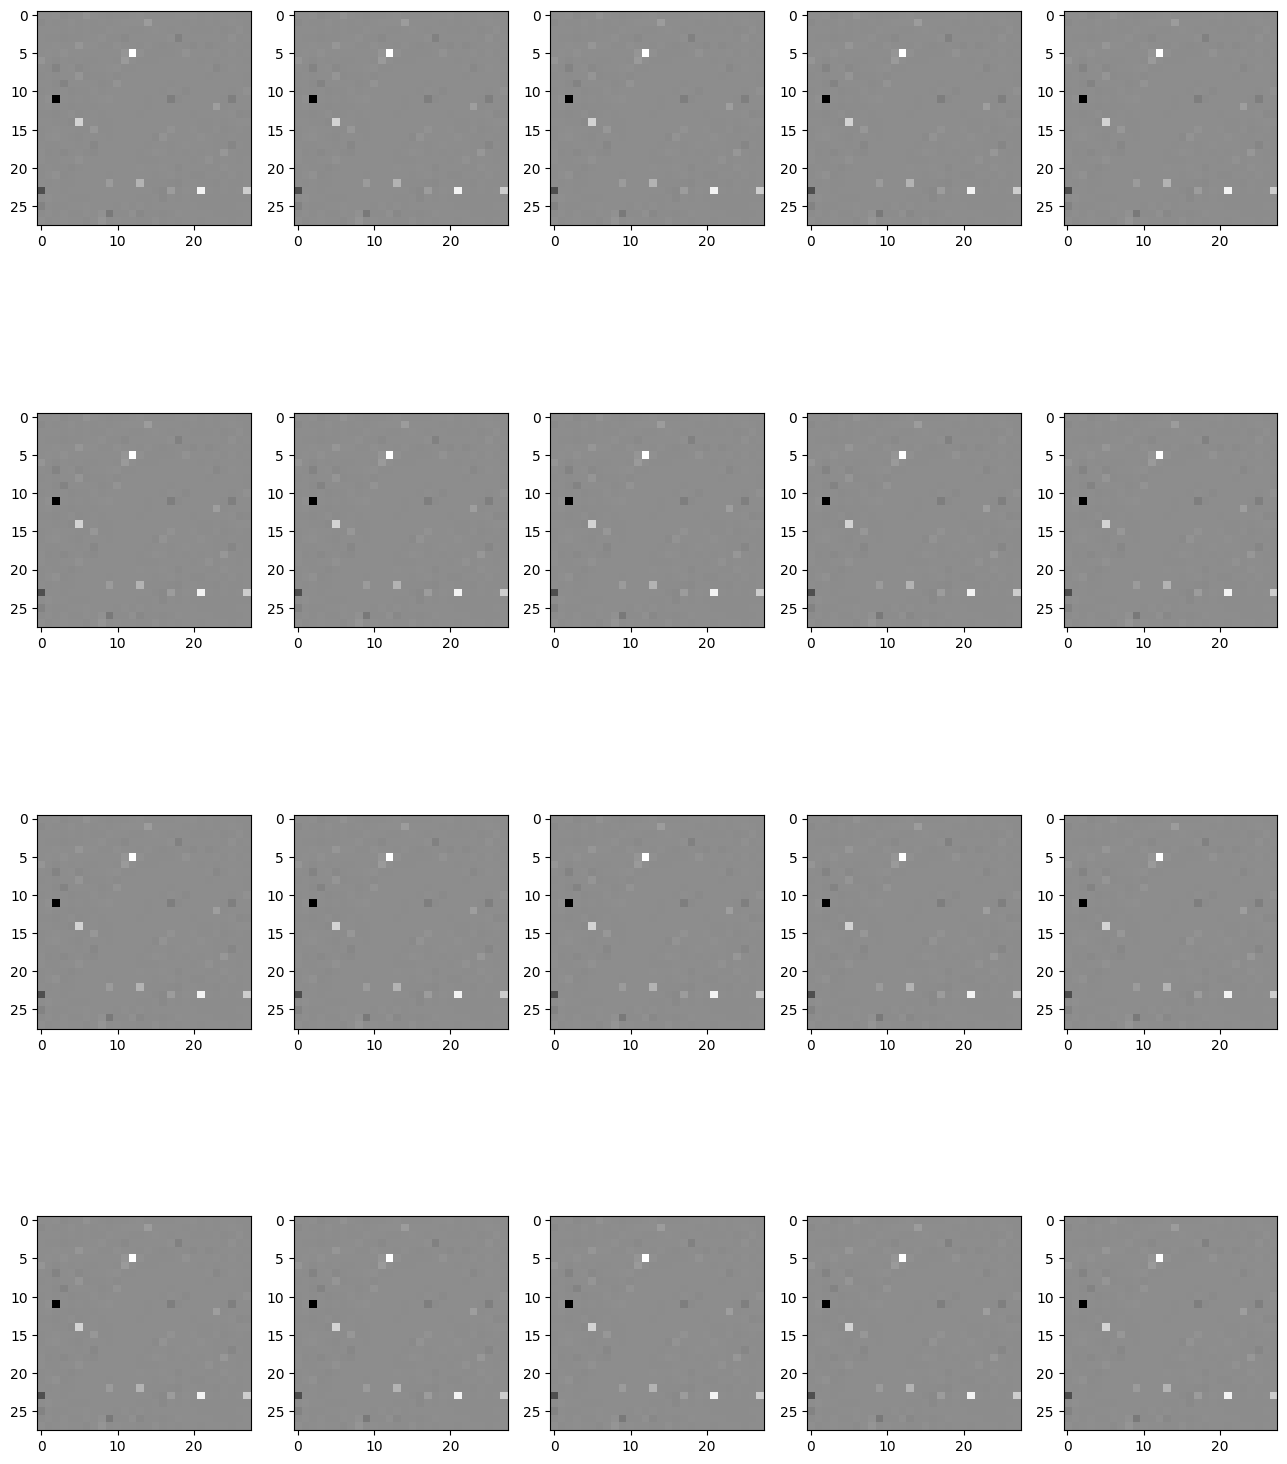

In [24]:
plt.figure(figsize=(16, 20))

for l in range(len(X_list)):
    row = l // 5
    col = l % 4
    plt.subplot(4, 5, l+1)
    img = X_list[l].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    
plt.show()